## Task

1. Define a basic ODE model (e.g., Newton's Law of Cooling or Population Growth).
2. Use `sympy` to apply separation of variables.
3. Determine the general and particular solutions.
4. Plot the results for different initial conditions.

# Newton's Law of Cooling Example

$$ \frac{dT}{dt} = -k(T - T_{env}) $$

## Algebraic solution

$$ \frac{dT}{T - T_{env}} = -k dt $$
$$ \int \frac{dT}{T - T_{env}} = \int -k dt $$
$$ \ln|T - T_{env}| = -kt + C $$
$$ T(t) = T_{env} + Ce^{-kt} $$



In [154]:
import numpy as np
from numpy.typing import ArrayLike, NDArray
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import solve_ivp

## Step by step solution

In [155]:
t, T, T_env, k, t0, T0 = sp.symbols("t T T_env k t0 T0", real=True)

# Equation: dT/dt = -k * (T - T_env)
# Separating variables gives: 1/(T - T_env) dT = -k dt

# LHS integrand (function of T)
lhs_integrand = 1 / (T - T_env)
# RHS integrand (function of t)
rhs_integrand = -k

# Integrate both sides
lhs_integral = sp.integrate(lhs_integrand, T)
rhs_integral = sp.integrate(rhs_integrand, t)

# Add constant of integration
C1 = sp.Symbol("C1")
rhs_integral += C1

# Integrated equation
eq = sp.Eq(lhs_integral, rhs_integral)

# Solve for T
T_solution = sp.solve(eq, T)[0]
print("General Solution for T:")
print(T_solution)

General Solution for T:
T_env + exp(C1 - k*t)


In [156]:
# Apply initial condition T(0) = T0
C1_value = sp.solve(T_solution.subs(t, t0) - T0, C1)[0]
T_particular = T_solution.subs(C1, C1_value)
print(f"Particular Solution with T(0)={T0}:")
print(T_particular)

Particular Solution with T(0)=T0:
T_env + (T0 - T_env)*exp(-k*t + k*t0)


In [157]:
T_env = 25.0  # Ambient temperature in degrees Celsius
k = 0.1  # Cooling constant

t0 = 0
T0 = 50

## Streamlined symbolic Solution with `sympy`

In [158]:
t = sp.Symbol("t")
T = sp.Function("T")(t)
eq = sp.Eq(sp.Derivative(T, t), -k * (T - T_env))

print("Differential equation:")
print(eq)

Differential equation:
Eq(Derivative(T(t), t), 2.5 - 0.1*T(t))


### General Solution

In [159]:
sol = sp.dsolve(eq)

print("General symbolic solution for T(t):")
print(sol)

General symbolic solution for T(t):
Eq(T(t), C1*exp(-0.1*t) + 25.0)


### Particular Solution

In [160]:
initial_conditions = {T.subs(t, t0): T0}
sol = sp.dsolve(eq, T, ics=initial_conditions)
sol = sol.simplify()

print(f"Particular symbolic solution for T(t) with T(0)={T0}:")
print(sol)

Particular symbolic solution for T(t) with T(0)=50:
Eq(T(t), 25.0 + 25.0*exp(-0.1*t))


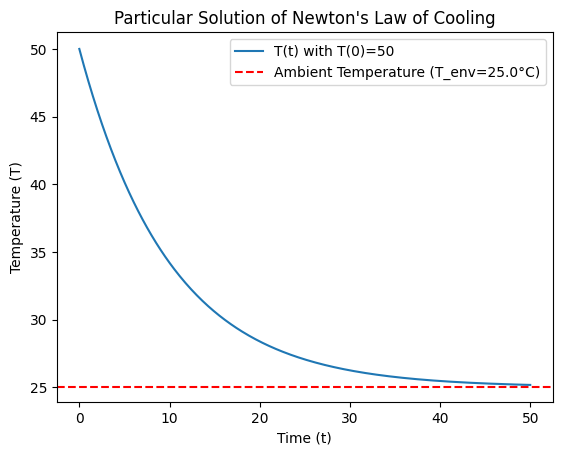

In [161]:
t_values = np.linspace(0, 50, 400)
T_lam = sp.lambdify(t, sol.rhs, "numpy")
T_values = T_lam(t_values)

plt.plot(t_values, T_values, label=f"T(t) with T(0)={T0}")
plt.axhline(
    T_env, color="red", linestyle="--", label=f"Ambient Temperature (T_env={T_env}°C)"
)

plt.title("Particular Solution of Newton's Law of Cooling")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.show()

## Phase portait

In [162]:
def system(
    t: ArrayLike,
    T: ArrayLike,
    T_env: float = 25.0,
    k: float = 0.1,
) -> tuple[NDArray, NDArray]:
    dt = np.ones_like(t)  # Time derivative of t is 1
    dT = -k * (T - T_env)
    return dt, dT

C:\Users\janvy\AppData\Local\Temp\ipykernel_26412\2466576618.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(


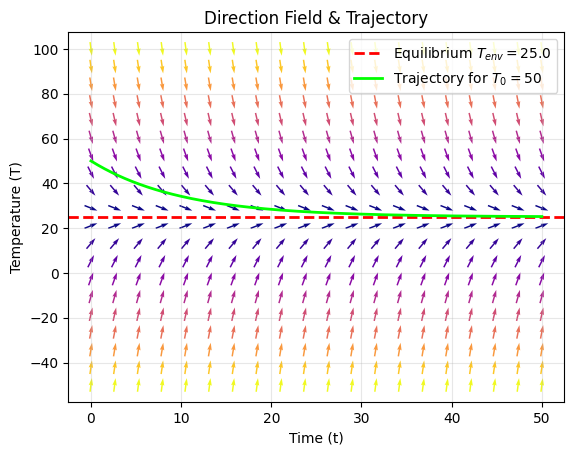

In [170]:
plt.figure()

t_grid = np.linspace(0, 50, 20)
T_grid = np.linspace(-50, 100, 20)
t_mesh, T_mesh = np.meshgrid(t_grid, T_grid)

# Calculate vector field
dt_mesh, dT_mesh = system(t_mesh, T_mesh)

# Vector normalization for better visuals
M = np.hypot(dt_mesh, dT_mesh)  # euler norm
M[M == 0] = 1.0  # Avoid division by zero
dt_norm = dt_mesh / M
dT_norm = dT_mesh / M

plt.quiver(t_mesh, T_mesh, dt_norm, dT_norm, M, pivot="mid", cmap="plasma")

plt.axhline(
    y=T_env,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Equilibrium $T_{{env}}={T_env}$",
)

# Plot the specific trajectory we calculated earlier
t_track = np.linspace(0, 50, 400)
T_lam = sp.lambdify(t, sol.rhs, "numpy")
T_track_vals = T_lam(t_track)
plt.plot(
    t_track,
    T_track_vals,
    "k-",
    linewidth=2,
    label=f"Trajectory for $T_0={T0}$",
    color="lime",
)

plt.title("Direction Field & Trajectory")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\janvy\AppData\Local\Temp\ipykernel_26412\1413254747.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(


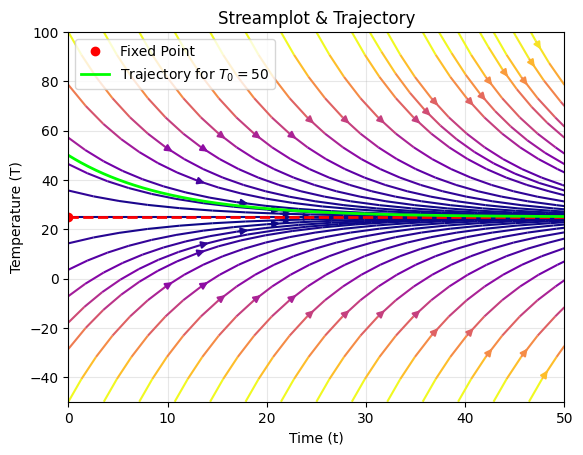

In [169]:
plt.figure()

t_grid = np.linspace(0, 50, 20)
T_grid = np.linspace(-50, 100, 20)
t_mesh, T_mesh = np.meshgrid(t_grid, T_grid)
dt_mesh, dT_mesh = system(t_mesh, T_mesh)

plt.streamplot(
    t_mesh,
    T_mesh,
    dt_mesh,
    dT_mesh,
    density=0.5,
    color=np.hypot(dt_mesh, dT_mesh),
    cmap="plasma",
    linewidth=1.5,
    broken_streamlines=False,
)

plt.axhline(y=T_env, color="red", linestyle="--", linewidth=2)

fixed_point = (0, T_env)
plt.plot(*fixed_point, "ro", label="Fixed Point")

# Plot the specific trajectory we calculated earlier
t_track = np.linspace(0, 50, 400)
T_lam = sp.lambdify(t, sol.rhs, "numpy")
T_track_vals = T_lam(t_track)
plt.plot(
    t_track,
    T_track_vals,
    "k-",
    linewidth=2,
    label=f"Trajectory for $T_0={T0}$",
    color="lime",
)

plt.title("Streamplot & Trajectory")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Numerical solution

## Stability Analysis

This system is **autonomous** ($\frac{dT}{dt} = f(T)$), meaning the rate of change depends only on the state $T$, not explicitly on time.

The equilibrium point (fixed point) is found where $\dot{T} = 0$:
$$ -k(T - T_{env}) = 0 \implies T^* = T_{env} $$

To determine stability, we look at the derivative of the vector field definition $f(T) = -k(T - T_{env})$ with respect to $T$:
$$ \lambda = \frac{df}{dT} = -k $$

Since $k > 0$, we have $\lambda < 0$. A negative eigenvalue indicates that perturbations decay, making $T_{env}$ an **asymptotically stable** fixed point. This matches our intuition that temperature always settles to the environment temperature.

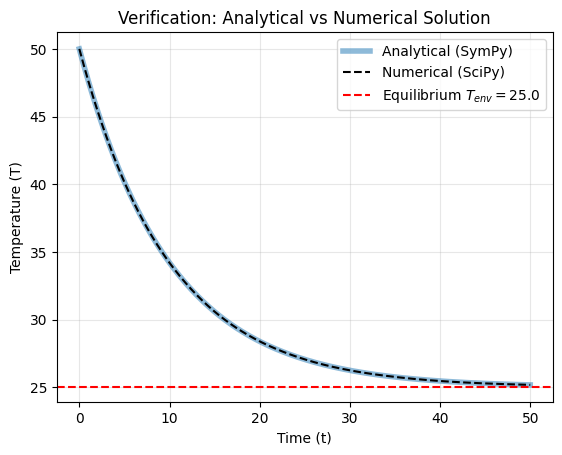

In [165]:
def ode_func(t, T, T_env=25.0, k=0.1):
    # Note: Scipy expects f(t, y) by default
    dTdt = -k * (T - T_env)
    return dTdt


t_num = np.linspace(0, 50, 400)

solution = solve_ivp(
    fun=lambda t, T: ode_func(t, T, T_env, k),
    t_span=[t_num[0], t_num[-1]],
    y0=[T0],
    t_eval=t_num,
)

T_num_values = solution.y.flatten()
T_ana_values = T_lam(t_num)

plt.figure()
plt.plot(
    t_num,
    T_ana_values,
    label=f"Analytical (SymPy)",
    linewidth=4,
    alpha=0.5,
)
plt.plot(
    t_num,
    T_num_values,
    "k--",
    label=f"Numerical (SciPy)",
)
plt.axhline(
    T_env,
    color="red",
    linestyle="--",
    label=f"Equilibrium $T_{{env}}={T_env}$",
)

plt.title("Verification: Analytical vs Numerical Solution")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()